In [1]:
import warnings
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import itertools
from IPython.display import clear_output
import operator
from collections import Counter

In [2]:
warnings.filterwarnings('ignore')
matplotlib.style.use('ggplot')

In [3]:
def to_Dex(input):

    '''Функция выполняет декодирование двоичного сигнала сквока и возвращает десятичное число\n

    Parameters
    ----------
        input : dtype = int, двоичное число\n'''

    bin = str()
    input = str(input)

    n1 = int(input[1])*1 + int(input[3])*2 + int(input[5])*4
    n2 = int(input[7])*1 + int(input[9])*2 + int(input[11])*4
    n3 = int(input[0])*1 + int(input[2])*2 + int(input[4])*4
    n4 = int(input[8])*1 + int(input[10])*2 + int(input[12])*4
    
    bin = int(str(n1) + str(n2) + str(n3) + str(n4))

    return bin


def to_Bin(number): # лютый хардкод (╯°□°）╯︵ ┻━┻, ужас, потом переделать 
    number = str(number)
    binNumber = list('0000000000000')

    dictOfRule = {
        '0' : [0, 0, 0],
        '1' : [1, 0, 0],
        '2' : [0, 1, 0],
        '3' : [1, 1, 0],
        '4' : [0, 0, 1],
        '5' : [1, 0, 1],
        '6' : [0, 1, 1],
        '7' : [1, 1, 1]
    }
    while(len(number)<4):
        number = '0' + number

    binNumber[0] = dictOfRule[number[2]][0]
    binNumber[1] = dictOfRule[number[0]][0]
    binNumber[2] = dictOfRule[number[2]][1]
    binNumber[3] = dictOfRule[number[0]][1]
    binNumber[4] = dictOfRule[number[2]][2]
    binNumber[5] = dictOfRule[number[0]][2]
    binNumber[6] = 0
    binNumber[7] = dictOfRule[number[1]][0]
    binNumber[8] = dictOfRule[number[3]][0]
    binNumber[9] = dictOfRule[number[1]][1]
    binNumber[10] = dictOfRule[number[3]][1]
    binNumber[11] = dictOfRule[number[1]][2]
    binNumber[12] = dictOfRule[number[3]][2]

    bin = str()
    for i in binNumber:
        bin = bin + str(i)

    return bin
        
def createCombinations(len):   # WARNING! словарь без пре- и постамбулы 
    
    '''Функция возвращает словарь с комбинациями двоичного сигнала без повторений\n
    ключ словаря - номер сквока в десятичной системе\n
    значение ключа - двоичный код десятичного ключа\n
    P.S. по сути соблюдается декодирование двоичного кода сквока'''
    
    dictOfSeq = dict()
    c = 0
    for i in itertools.product('01', repeat=len):
        s = ''.join(i)
        # s = s[:6] + "0" + s[6:] # вставка позиции Х, которая всегда равна нулю
        dictOfSeq[str(c)] = s
        c = int(c)
        c += 1
    
    return dictOfSeq

def getIndexes(input):
    for i in input:
#         tmp = to_Bin(int(input.iloc[i][0]))
        tmp = to_Bin(i)
        ind = list()
        for i in range(len(tmp)):
            if tmp[i] == '1':
                ind.append(i)
            
    return ind

def createFromReal(input):
    dictM = dict()
    sortedDict = dict()
    countStatus = 0
    countM = 0
    
#     for i in input.index:
    for i in input:
#         tmp = to_Bin(int(input.iloc[i][0]))
        tmp = to_Bin(i)
        ind = list()
        for i in range(len(tmp)):
            if tmp[i] == '1':
                ind.append(i)

        # ind = getIndexes(input)
    
        tmp = [int(a) for a in tmp]
        tmp = np.asfarray(tmp)

        comb = createCombinations(len(ind))

        dictCombs = dict()

        for i in comb:  
            out_s = [int(a) for a in comb[str(i)]]
            count = 0
            for j in ind:    
                tmp[j] = out_s[count]
                count += 1
            dictCombs[i] = tmp.copy()


        for j in dictCombs: 
            tl = str()       
            for i in dictCombs[j]:
                i = str(int(i))
                tl = tl+i
            dictM[countM] = [to_Dex(tl), tl]
            countM += 1


#         sortedDict = sorted(dictM.items(),key=operator.itemgetter(1))
        sortedDict = sorted(dictM.values(),key=operator.itemgetter(1))
        sortedDict = dict(sortedDict)
        
        countStatus += 1
        clear_output(wait=True)
        print("status:\t", countStatus/input.shape[0] * 100, "%")
    return sortedDict


def testFun(input):
    dictM = dict()
    sortedDict = dict()
    countStatus = 0
    countM = 0

    #     for i in input.index:
    for i in sq_uniq:
    #         tmp = to_Bin(int(input.iloc[i][0]))
        tmp = to_Bin(i)
        ind = list()
        for i in range(len(tmp)):
            if tmp[i] == '1':
                ind.append(i)

        # ind = getIndexes(input)

        tmp = [int(a) for a in tmp]
        tmp = np.asfarray(tmp)

        comb = createCombinations(len(ind))

        dictCombs = dict()

        for i in comb:  
            out_s = [int(a) for a in comb[str(i)]]
            count = 0
            for j in ind:    
                tmp[j] = out_s[count]
                count += 1
            dictCombs[i] = tmp.copy()


        for j in dictCombs: 
            tl = str()       
            for i in dictCombs[j]:
                i = str(int(i))
                tl = tl+i
            dictM[countM] = to_Dex(tl)
            countM += 1


    #         sortedDict = sorted(dictM.items(),key=operator.itemgetter(1))
        sortedDict = sorted(dictM.values())
        # sortedDict = dict(sortedDict)
        
        countStatus += 1
        clear_output(wait=True)
        print("status:\t", countStatus/sq_uniq.shape[0] * 100, "%")
    return sortedDict
    

In [4]:
data = pd.read_csv('DataSet_Signal.csv', delimiter=';')
noise = pd.read_csv("DataSet_Noise.csv")
data.head(3)

,label,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample76,sample77,sample78,sample79,sample80,sample81,sample82,sample83,sample84,sample85
0,615,537.90,1647.9,396.92,97.252,81.320,86.279,941.60,1594.7,253.86,...,226.210,1471.8,985.31,40.706,20.248,81.615,297.470,1581.6,672.33,143.850
1,615,212.90,1657.5,1134.00,91.082,151.400,55.902,434.19,1804.9,907.44,...,83.217,1016.1,1744.10,121.200,40.012,31.064,81.615,1394.2,1494.40,53.085
2,615,105.22,1385.6,1053.30,125.210,18.248,51.856,265.71,1512.6,749.35,...,51.624,875.4,1556.00,189.560,69.116,63.159,76.164,1134.3,1245.20,90.609


In [5]:
listOfPoints = [2, 8, 14, 19, 25, 31, 37, 43, 49, 54, 60, 66, 72, 77, 83]  # порядковый номер столбцов в датасете соответствующий информационным импульсам (взят из excel)

In [6]:
rules = {
    0: [7,8,9],
    1: [13,14,15],
    2: [18,19,20],
    3: [24,25,26],
    4: [30,31,32],
    5: [36,37,38],
    6: [42,43,44],
    7: [48,49,50],
    8: [53,54,55],
    9: [59,60,61],
    10: [65,66,67],
    11: [71,72,73],
    12: [76,77,78]
}

In [7]:
tmp = to_Bin(615)
ind = list()
for i in range(len(tmp)):
    if tmp[i] == '1':
        ind.append(i)
print(tmp)
ind

1000000011011


[0, 8, 9, 11, 12]

In [8]:
# ----------------------------------

In [9]:
sq_uniq = data['label'].unique()
dataDict = dict()
sd = testFun(sq_uniq)
sd = np.asfarray(sd, dtype=int)

status:	 100.0 %


In [10]:
print("Уникальные значения: {0}\nВсего уникальных: {1}"
    .format(sq_uniq,len(sq_uniq)))
print("\nСоздано из имеющихся:\n\tвсего записей: {0}\n\tиз них уникальных: {1}"
    .format(len(sd),np.unique(sd).shape[0]))

Уникальные значения: [ 615 1220 1524 1551 2042 2175 2403 2404 2406 2421 2422 2454 2457 5124
 5224 5401 5724 6224 6234 6737 7360 7624]
Всего уникальных: 22

Создано из имеющихся:
	всего записей: 2088
	из них уникальных: 1328


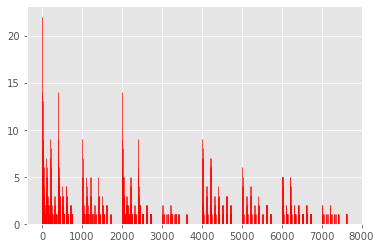

In [11]:
c = Counter(sd)
fig, ax = plt.subplots()
ax.bar(c.keys(),c.values(), width=1, edgecolor="red", linewidth=0.7)
plt.show()

In [12]:
# ----------------------------------

<AxesSubplot:>

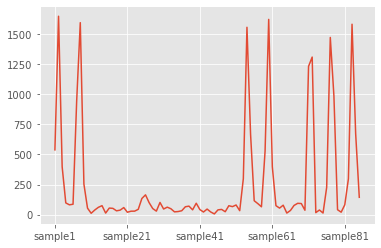

In [13]:
data.iloc[0][1:].plot()

In [14]:
for i in ind:
    data.at[0,'sample'+str(rules[i][0])] = noise.at[0,'sample'+str(rules[i][0])]
    data.at[0,'sample'+str(rules[i][1])] = noise.at[0,'sample'+str(rules[i][1])]
    data.at[0,'sample'+str(rules[i][2])] = noise.at[0,'sample'+str(rules[i][2])]